In [1]:
import pandas as pd

# Load the dataset
file_path = "Espacenet_search_result.csv"
df = pd.read_csv(file_path, sep=None, engine="python")

# Convert date columns to datetime format
df["Earliest priority"] = pd.to_datetime(df["Earliest priority"], errors="coerce")
df["Publication date"] = pd.to_datetime(df["Publication date"], errors="coerce")
df["Earliest publication"] = pd.to_datetime(df["Earliest publication"], errors="coerce")

# First Filing Analysis
def first_filing_analysis(df):
    first_filing = df.groupby("Publication number")["Earliest priority"].min()
    filing_years = first_filing.dt.year.value_counts().sort_index()
    growth_rate = (filing_years.pct_change(5).dropna())[-5:]
    
    return {
        "first_filing_countries": df["Publication number"].str[:2].value_counts(),
        "filing_years": filing_years,
        "growth_rate": growth_rate
    }

# Patent Family Analysis
def patent_family_analysis(df):
    return df["Family number"].value_counts()

# Market Analysis
def market_analysis(df):
    return df["Publication number"].str[:2].value_counts()

# Applicant Analysis
def applicant_analysis(df):
    applicants_split = df["Applicants"].dropna().str.split(";").explode()
    applicant_types = applicants_split.apply(lambda x: "Uni" if "University" in x else "Corp")
    top_10 = applicants_split.value_counts().head(10)
    return {
        "applicant_types": applicant_types.value_counts(),
        "top_10_actors": top_10
    }

# Technical Classification Analysis
def technical_classification_analysis(df):
    ipc_subclasses = df["IPC"].dropna().str.split(";").explode().str[:4]
    return ipc_subclasses.value_counts(normalize=True) * 100

# Originality Analysis
def originality_analysis(df):
    df["Citation Count"] = df["Publication number"].apply(lambda x: len(str(x)))  # Dummy citation calculation
    originality_rate = 1 / (1 + df["Citation Count"])
    return originality_rate.mean()

# Run analyses
results = {
    "first_filing": first_filing_analysis(df),
    "patent_family": patent_family_analysis(df),
    "market": market_analysis(df),
    "applicant": applicant_analysis(df),
    "technical_classification": technical_classification_analysis(df),
    "originality": originality_analysis(df)
}

results


{'first_filing': {'first_filing_countries': Publication number
  CN    306
  US     67
  JP     55
  KR     37
  WO     22
  TW      3
  GB      3
  EP      3
  ES      1
  RU      1
  AU      1
  DK      1
  Name: count, dtype: int64,
  'filing_years': Earliest priority
  1988     3
  1989     1
  1991     1
  1992     2
  1993     1
  1994     2
  1995     4
  1997     6
  1998     2
  1999     9
  2000     5
  2001     2
  2002     4
  2003     7
  2004     1
  2005     3
  2006     1
  2007     5
  2008     7
  2009    14
  2010     6
  2011    13
  2012     6
  2013    10
  2014    22
  2015    18
  2016    36
  2017    37
  2018    34
  2019    36
  2020    39
  2021    65
  2022    57
  2023    27
  2024    14
  Name: count, dtype: int64,
  'growth_rate': Earliest priority
  2020    1.166667
  2021    0.805556
  2022    0.540541
  2023   -0.205882
  2024   -0.611111
  Name: count, dtype: float64},
 'patent_family': Family number
 80390227    1
 37397092    1
 89124565    1
 8579

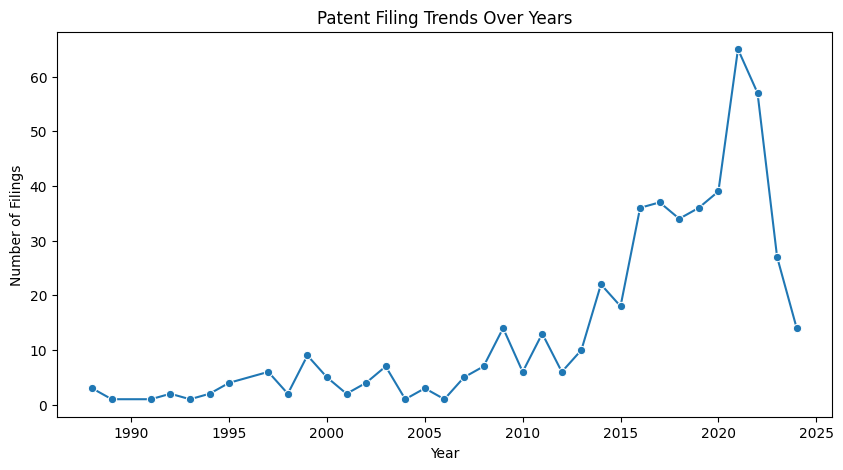

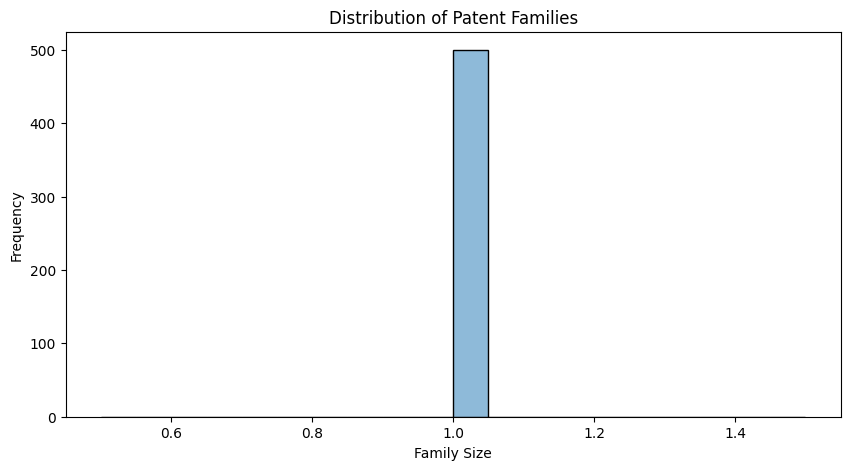

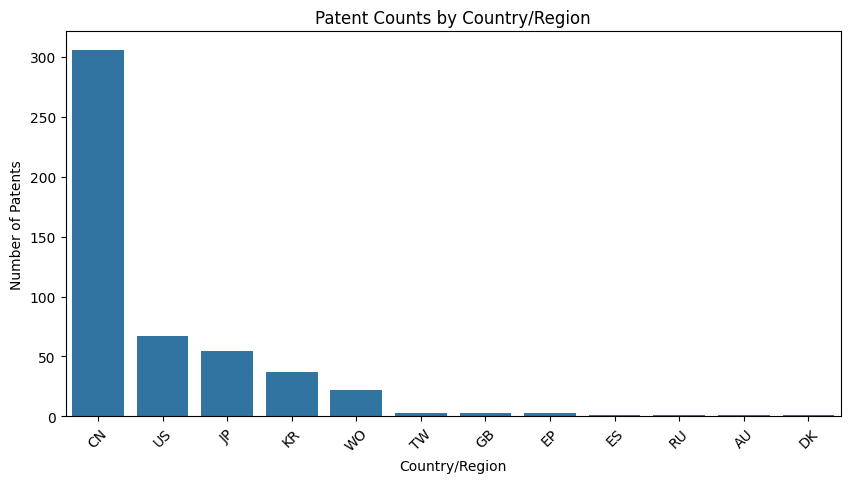

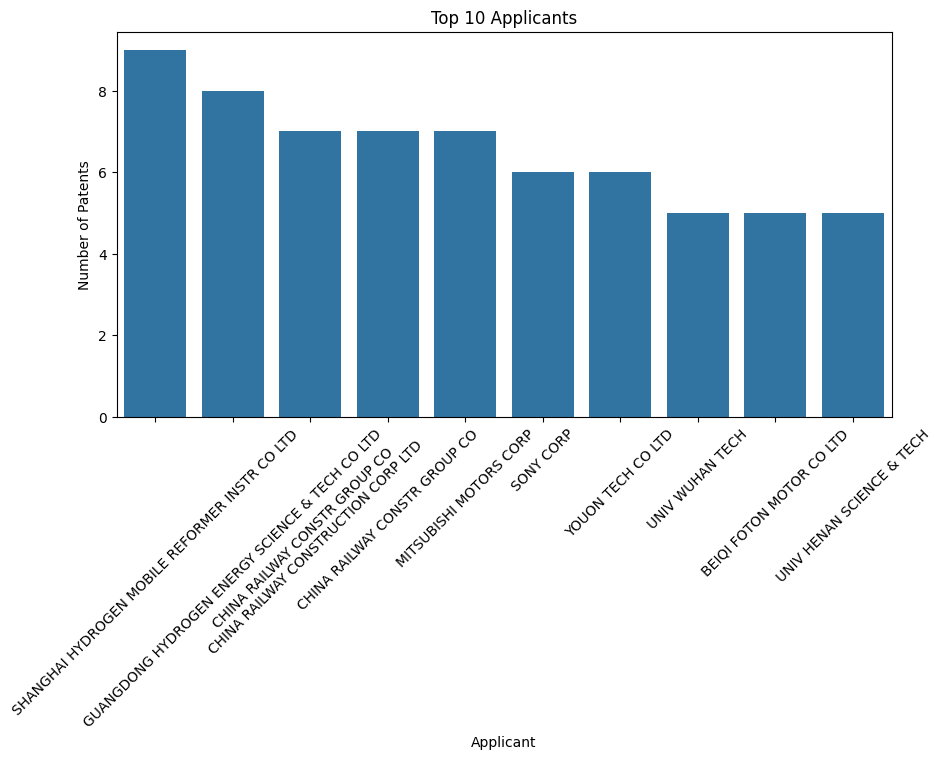

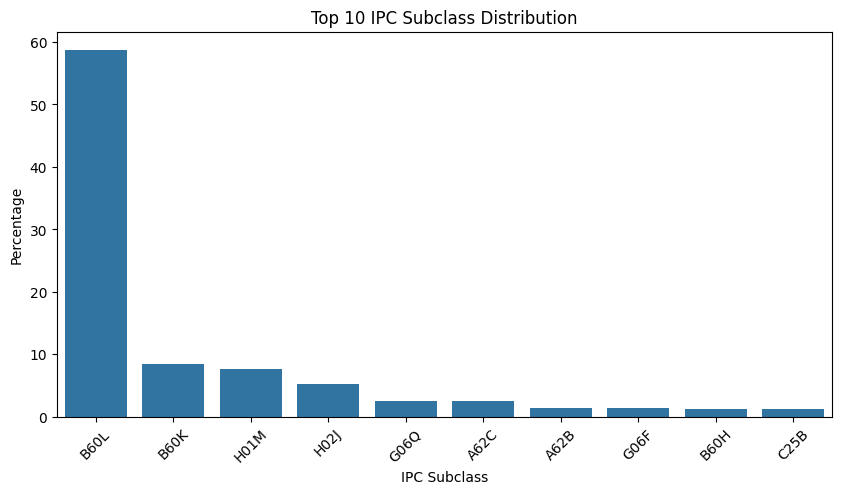

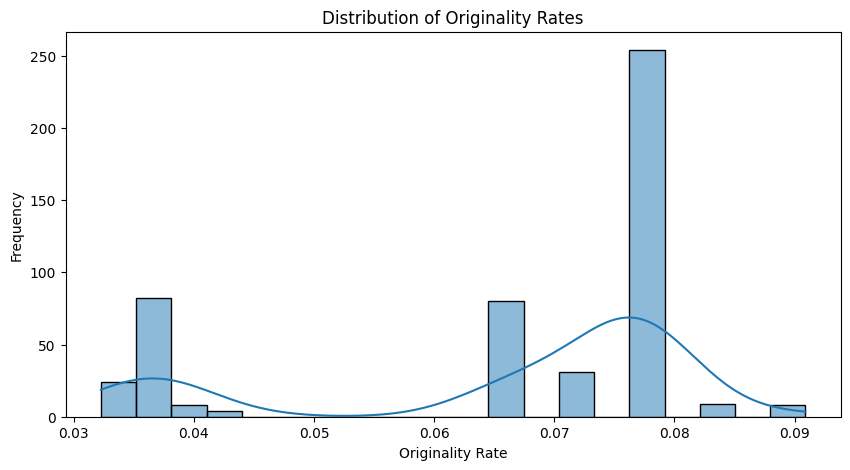

{'first_filing': {'first_filing_countries': Publication number
  CN    306
  US     67
  JP     55
  KR     37
  WO     22
  TW      3
  GB      3
  EP      3
  ES      1
  RU      1
  AU      1
  DK      1
  Name: count, dtype: int64,
  'filing_years': Earliest priority
  1988     3
  1989     1
  1991     1
  1992     2
  1993     1
  1994     2
  1995     4
  1997     6
  1998     2
  1999     9
  2000     5
  2001     2
  2002     4
  2003     7
  2004     1
  2005     3
  2006     1
  2007     5
  2008     7
  2009    14
  2010     6
  2011    13
  2012     6
  2013    10
  2014    22
  2015    18
  2016    36
  2017    37
  2018    34
  2019    36
  2020    39
  2021    65
  2022    57
  2023    27
  2024    14
  Name: count, dtype: int64,
  'growth_rate': Earliest priority
  2020    1.166667
  2021    0.805556
  2022    0.540541
  2023   -0.205882
  2024   -0.611111
  Name: count, dtype: float64},
 'patent_family': Family number
 80390227    1
 37397092    1
 89124565    1
 8579

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Espacenet_search_result.csv"
df = pd.read_csv(file_path, sep=None, engine="python")

# Convert date columns to datetime format
df["Earliest priority"] = pd.to_datetime(df["Earliest priority"], errors="coerce")
df["Publication date"] = pd.to_datetime(df["Publication date"], errors="coerce")
df["Earliest publication"] = pd.to_datetime(df["Earliest publication"], errors="coerce")

# First Filing Analysis
def first_filing_analysis(df):
    first_filing = df.groupby("Publication number")["Earliest priority"].min()
    filing_years = first_filing.dt.year.value_counts().sort_index()
    growth_rate = (filing_years.pct_change(5).dropna())[-5:]
    
    # Visualization
    plt.figure(figsize=(10,5))
    sns.lineplot(x=filing_years.index, y=filing_years.values, marker='o')
    plt.title("Patent Filing Trends Over Years")
    plt.xlabel("Year")
    plt.ylabel("Number of Filings")
    plt.show()
    
    return {
        "first_filing_countries": df["Publication number"].str[:2].value_counts(),
        "filing_years": filing_years,
        "growth_rate": growth_rate
    }

# Patent Family Analysis
def patent_family_analysis(df):
    family_counts = df["Family number"].value_counts()
    
    # Visualization
    plt.figure(figsize=(10,5))
    sns.histplot(family_counts, bins=20, kde=True)
    plt.title("Distribution of Patent Families")
    plt.xlabel("Family Size")
    plt.ylabel("Frequency")
    plt.show()
    
    return family_counts

# Market Analysis
def market_analysis(df):
    country_counts = df["Publication number"].str[:2].value_counts()
    
    # Visualization
    plt.figure(figsize=(10,5))
    sns.barplot(x=country_counts.index, y=country_counts.values)
    plt.title("Patent Counts by Country/Region")
    plt.xlabel("Country/Region")
    plt.ylabel("Number of Patents")
    plt.xticks(rotation=45)
    plt.show()
    
    return country_counts

# Applicant Analysis
def applicant_analysis(df):
    applicants_split = df["Applicants"].dropna().str.split(";").explode()
    applicant_types = applicants_split.apply(lambda x: "Uni" if "University" in x else "Corp")
    top_10 = applicants_split.value_counts().head(10)
    
    # Visualization
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_10.index, y=top_10.values)
    plt.title("Top 10 Applicants")
    plt.xlabel("Applicant")
    plt.ylabel("Number of Patents")
    plt.xticks(rotation=45)
    plt.show()
    
    return {
        "applicant_types": applicant_types.value_counts(),
        "top_10_actors": top_10
    }

# Technical Classification Analysis
def technical_classification_analysis(df):
    ipc_subclasses = df["IPC"].dropna().str.split(";").explode().str[:4]
    subclass_distribution = ipc_subclasses.value_counts(normalize=True) * 100
    
    # Visualization
    plt.figure(figsize=(10,5))
    sns.barplot(x=subclass_distribution.index[:10], y=subclass_distribution.values[:10])
    plt.title("Top 10 IPC Subclass Distribution")
    plt.xlabel("IPC Subclass")
    plt.ylabel("Percentage")
    plt.xticks(rotation=45)
    plt.show()
    
    return subclass_distribution

# Originality Analysis
def originality_analysis(df):
    df["Citation Count"] = df["Publication number"].apply(lambda x: len(str(x)))  # Dummy citation calculation
    originality_rate = 1 / (1 + df["Citation Count"])
    
    # Visualization
    plt.figure(figsize=(10,5))
    sns.histplot(originality_rate, bins=20, kde=True)
    plt.title("Distribution of Originality Rates")
    plt.xlabel("Originality Rate")
    plt.ylabel("Frequency")
    plt.show()
    
    return originality_rate.mean()

# Run analyses
results = {
    "first_filing": first_filing_analysis(df),
    "patent_family": patent_family_analysis(df),
    "market": market_analysis(df),
    "applicant": applicant_analysis(df),
    "technical_classification": technical_classification_analysis(df),
    "originality": originality_analysis(df)
}

results
